# Helper Functions

In [ ]:
import os
root_path = '/raid/ee-mariyam/maryam/abhijeet/Combined_Files'
def get_jpg_paths(base_dir):
    jpg_dict = {}
    
    for folder_name in os.listdir(base_dir):
        folder_path = os.path.join(base_dir, folder_name)
        
        if os.path.isdir(folder_path):
            jpg_paths = []
            
            for file_name in os.listdir(folder_path):
                if file_name.lower().endswith('.jpg'):
                    file_path = os.path.join(folder_path, file_name)
                    jpg_paths.append(file_path)
            
            if jpg_paths:
                jpg_dict[folder_name] = jpg_paths
    
    return jpg_dict

combined_files_path = root_path
jpg_paths_dict = get_jpg_paths(combined_files_path)


In [2]:
import os
import torch
import torchvision.transforms as transforms
from torchvision import datasets, models
from torch.utils.data import DataLoader, random_split
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix
import torch.nn.functional as F 
import cv2
from PIL import Image
import warnings
warnings.filterwarnings("ignore")


In [3]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [ ]:
def evaluate_model(model, val_loader):
    model.eval()
    all_labels = []
    all_preds = []
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())
    
    all_labels = np.array(all_labels)
    all_preds = np.array(all_preds)
    return all_labels, all_preds



In [6]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, num_classes, class_names):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=class_names,
                yticklabels=class_names)
    
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()


In [ ]:
def plot_losses_and_accuracies(train_losses, val_losses, train_accuracies, val_accuracies):

    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss', color='blue')
    plt.plot(val_losses, label='Validation Loss', color='orange')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid()
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Training Accuracy', color='green')
    plt.plot(val_accuracies, label='Validation Accuracy', color='red')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.grid()
    plt.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_classwise_accuracy(cm, jpg_paths_dict):
    total_accuracy = np.trace(cm) / np.sum(cm)

    classwise_accuracy = cm.diagonal() / cm.sum(axis=1)

    class_names = list(jpg_paths_dict.keys())  
    classwise_accuracy = [
        acc if cm.sum(axis=1)[i] > 0 else np.nan
        for i, acc in enumerate(classwise_accuracy)
    ]

    print(f"Total Accuracy: {total_accuracy * 100:.2f}%")
    for i, accuracy in enumerate(classwise_accuracy):
        if np.isnan(accuracy):
            print(f"Class '{class_names[i]}' Accuracy: N/A (no samples)")
        else:
            print(f"Class '{class_names[i]}' Accuracy: {accuracy * 100:.2f}%")

    plt.figure(figsize=(10, 6))
    plt.bar(class_names, classwise_accuracy, color='skyblue')
    plt.ylabel('Accuracy')
    plt.title('Class-wise Accuracy')
    plt.ylim(0, 1)  
    plt.axhline(total_accuracy, color='red', linestyle='--', label='Total Accuracy')
    plt.xticks(rotation=45)  
    plt.legend()
    plt.grid(axis='y')
    plt.tight_layout() 
    plt.show()

In [9]:
jpg_paths_comb_dict = jpg_paths_dict.copy()
anthra = jpg_paths_comb_dict['Anthracnose']
twist = jpg_paths_comb_dict['Twister']
antra_twist = anthra+twist
jpg_paths_comb_dict['Antracnose_Twister'] = antra_twist

jpg_paths_comb_dict.pop('Anthracnose', None)
jpg_paths_comb_dict.pop('Twister', None)


['/raid/ee-mariyam/maryam/abhijeet/Combined_Files/Twister/D E6 06.10.2023 DSC_3185.JPG',
 '/raid/ee-mariyam/maryam/abhijeet/Combined_Files/Twister/D E6 06.10.2023 DSC_3244.JPG',
 '/raid/ee-mariyam/maryam/abhijeet/Combined_Files/Twister/D E6 14.11.2023 DSC_6556.JPG',
 '/raid/ee-mariyam/maryam/abhijeet/Combined_Files/Twister/S E6 25.10.2023 IMG_20231025_094620957.jpg',
 '/raid/ee-mariyam/maryam/abhijeet/Combined_Files/Twister/D E6 14.11.2023 DSC_6553.JPG',
 '/raid/ee-mariyam/maryam/abhijeet/Combined_Files/Twister/S E6 25.10.2023 IMG_20231025_094709204.jpg',
 '/raid/ee-mariyam/maryam/abhijeet/Combined_Files/Twister/D E6 06.10.2023 DSC_3270.JPG',
 '/raid/ee-mariyam/maryam/abhijeet/Combined_Files/Twister/D E6 17.11.2023 DSC_6919.JPG',
 '/raid/ee-mariyam/maryam/abhijeet/Combined_Files/Twister/S E6 06.10.2023 IMG_20231006_163321~2.jpg',
 '/raid/ee-mariyam/maryam/abhijeet/Combined_Files/Twister/S E6 07.10.2023 IMG20231007113350.jpg',
 '/raid/ee-mariyam/maryam/abhijeet/Combined_Files/Twister/S 

In [10]:
for subfolder, jpg_files in jpg_paths_comb_dict.items():
    print(f"Subfolder: {subfolder}")
    print(f"Number of JPEG files: {len(jpg_files)}")
    print()

Subfolder: Purple_Blotch
Number of JPEG files: 406

Subfolder: Thrips
Number of JPEG files: 546

Subfolder: IYSV
Number of JPEG files: 754

Subfolder: Healthy
Number of JPEG files: 1072

Subfolder: Bulb Rot
Number of JPEG files: 669

Subfolder: Basal_Rot
Number of JPEG files: 140

Subfolder: Stemphylium
Number of JPEG files: 661

Subfolder: Antracnose_Twister
Number of JPEG files: 1082



In [ ]:

from torch.utils.data import Dataset, DataLoader

class CustomImageDataset(Dataset):
    def __init__(self, jpg_files_dict, transform=None):
        self.transform = transform
        self.image_paths = []
        self.labels = []
        self.label_map = {}
        self._prepare_data(jpg_files_dict)

        self.default_transform = transforms.Compose([
            transforms.ToTensor(),  
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  
        ])

    def _prepare_data(self, jpg_files_dict):
        for label_idx, (subfolder, file_paths) in enumerate(jpg_files_dict.items()):
            self.label_map[subfolder] = label_idx
            for file_path in file_paths:
                self.image_paths.append(file_path)
                self.labels.append(label_idx)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        try:
            image = Image.open(img_path).convert('RGB')
        except (OSError, IOError) as e:
            print(f'Error loading image {img_path}: {e}')
            image = Image.new('RGB', (224, 224))  
            label = self.labels[idx]
        else:
            label = self.labels[idx]

        if self.transform:
            image = self.transform(image)
        else:
            image = self.default_transform(image)

        return image, label


## New

In [ ]:
from PIL import Image
import numpy as np
import cv2

class BalancedDataset(CustomImageDataset):
    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        label = self.labels[idx]

        try:
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            if image is None or image.size == 0:
                raise ValueError("Invalid image")
        except Exception:
            image = np.zeros((224, 224, 3), dtype=np.uint8)  
        image = Image.fromarray(image)

        if self.transform:
            image = self.transform(image)
        else:
            image = self.default_transform(image)

        return image, label


In [ ]:

def mixup_data(x, y, alpha=0.4):
    if alpha > 0:
        lam = np.random.beta(alpha, alpha)
    else:
        lam = 1
        
    batch_size = x.size()[0]
    index = torch.randperm(batch_size).to(x.device)
    
    mixed_x = lam * x + (1 - lam) * x[index]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam

def mixup_loss(pred, y_a, y_b, lam, criterion):
    return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models


model = models.densenet121(pretrained=True)

num_classes = len(jpg_paths_comb_dict)

model.classifier = nn.Linear(model.classifier.in_features, num_classes)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

dataset = BalancedDataset(jpg_files_dict=jpg_paths_comb_dict, transform=transform)


In [ ]:

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
train_loader = DataLoader(train_dataset, batch_size=32, num_workers=64)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=64)

In [31]:

import numpy as np
import torch
class_counts = []
for subfolder, jpg_files in jpg_paths_comb_dict.items():
    class_counts.append(len(jpg_files))
def compute_class_weights(label_map, dataset):
    print(class_counts)
    class_weights = np.max(class_counts) / class_counts
    class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)
    print(class_weights)
    return class_weights

class_weights = compute_class_weights(dataset.label_map, dataset)
criterion = nn.CrossEntropyLoss(weight=class_weights)


[406, 546, 754, 1072, 669, 140, 661, 1082]
tensor([2.6650, 1.9817, 1.4350, 1.0093, 1.6173, 7.7286, 1.6369, 1.0000],
       device='cuda:0')


In [32]:
def validate(model, val_loader, criterion):
    model.eval()
    val_running_loss = 0.0
    val_corrects = 0
    val_total = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_running_loss += loss.item() * inputs.size(0)

            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_corrects += (predicted == labels).sum().item()

    val_loss = val_running_loss / len(val_loader.dataset)
    val_acc = val_corrects / val_total
    return val_loss, val_acc


In [ ]:
from torch.optim.lr_scheduler import ReduceLROnPlateau
def train_model_enhanced(model, train_loader, val_loader, criterion, optimizer, num_epochs=20):
    scheduler = ReduceLROnPlateau(optimizer, 'max', patience=3, factor=0.5, verbose=True)
    best_acc = 0.0
    train_losses, train_accuracies = [], []
    val_losses, val_accuracies = [], []
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        corrects = 0
        total = 0
        
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            inputs, targets_a, targets_b, lam = mixup_data(inputs, labels, alpha=0.4)
            
            optimizer.zero_grad()
            
            outputs = model(inputs)
            loss = mixup_loss(outputs, targets_a, targets_b, lam, criterion)
            
            loss.backward()
            optimizer.step()
            
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            corrects += (lam * (predicted == targets_a).sum().item() + 
                        (1 - lam) * (predicted == targets_b).sum().item())
            
            running_loss += loss.item() * inputs.size(0)
        
        val_loss, val_acc = validate(model, val_loader, criterion)
        train_loss = running_loss / len(train_loader.dataset)
        train_acc = corrects / total
        
        scheduler.step(val_acc)
        
        if val_acc > best_acc:
            best_acc = val_acc
            torch.save(model.state_dict(), 'densenet_only_cutmix.pth')
        
        
        train_losses.append(train_loss)
        train_accuracies.append(train_acc)
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)
        print(f'Epoch {epoch+1}: '
              f'Train Loss: {running_loss/len(train_loader.dataset):.4f} '
              f'Train Acc: {corrects/total:.4f} '
              f'Val Loss: {val_loss:.4f} Val Acc: {val_acc:.4f}')
    
    return train_losses, train_accuracies, val_losses, val_accuracies, model


In [ ]:
train_losses, train_accuracies, val_losses, val_accuracies, model = train_model_enhanced(model, train_loader, val_loader, criterion, optimizer, num_epochs=30)

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 1: Train Loss: 1.2004 Train Acc: 0.6239 Val Loss: 1.2555 Val Acc: 0.6398


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 2: Train Loss: 1.0508 Train Acc: 0.6891 Val Loss: 0.5948 Val Acc: 0.8255


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 3: Train Loss: 0.9156 Train Acc: 0.7444 Val Loss: 0.5428 Val Acc: 0.8480


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 4: Train Loss: 0.9377 Train Acc: 0.7341 Val Loss: 0.5831 Val Acc: 0.8433


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 5: Train Loss: 0.7922 Train Acc: 0.7861 Val Loss: 0.3511 Val Acc: 0.8959


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 6: Train Loss: 0.8429 Train Acc: 0.7723 Val Loss: 0.4353 Val Acc: 0.9174


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 7: Train Loss: 0.7627 Train Acc: 0.7862 Val Loss: 0.3529 Val Acc: 0.9109


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 8: Train Loss: 0.7222 Train Acc: 0.8096 Val Loss: 0.3683 Val Acc: 0.8931


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 9: Train Loss: 0.7928 Train Acc: 0.7769 Val Loss: 0.3727 Val Acc: 0.9174


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 00010: reducing learning rate of group 0 to 5.0000e-04.
Epoch 10: Train Loss: 0.6787 Train Acc: 0.8237 Val Loss: 0.3211 Val Acc: 0.9099


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 11: Train Loss: 0.5554 Train Acc: 0.8639 Val Loss: 0.2241 Val Acc: 0.9484


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 12: Train Loss: 0.5733 Train Acc: 0.8416 Val Loss: 0.2401 Val Acc: 0.9343


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 13: Train Loss: 0.5031 Train Acc: 0.8752 Val Loss: 0.2442 Val Acc: 0.9484


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 14: Train Loss: 0.5490 Train Acc: 0.8500 Val Loss: 0.2576 Val Acc: 0.9437


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 00015: reducing learning rate of group 0 to 2.5000e-04.
Epoch 15: Train Loss: 0.5512 Train Acc: 0.8532 Val Loss: 0.2828 Val Acc: 0.9428


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 16: Train Loss: 0.4703 Train Acc: 0.8770 Val Loss: 0.2285 Val Acc: 0.9587


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 17: Train Loss: 0.4842 Train Acc: 0.8621 Val Loss: 0.2257 Val Acc: 0.9587


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 18: Train Loss: 0.4862 Train Acc: 0.8659 Val Loss: 0.2147 Val Acc: 0.9597


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 19: Train Loss: 0.4968 Train Acc: 0.8593 Val Loss: 0.2128 Val Acc: 0.9587


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 20: Train Loss: 0.4952 Train Acc: 0.8525 Val Loss: 0.1686 Val Acc: 0.9690


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 21: Train Loss: 0.5132 Train Acc: 0.8489 Val Loss: 0.2274 Val Acc: 0.9662


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 22: Train Loss: 0.5724 Train Acc: 0.8283 Val Loss: 0.2453 Val Acc: 0.9550


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 23: Train Loss: 0.4984 Train Acc: 0.8691 Val Loss: 0.2056 Val Acc: 0.9615


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 00024: reducing learning rate of group 0 to 1.2500e-04.
Epoch 24: Train Loss: 0.4503 Train Acc: 0.8673 Val Loss: 0.2422 Val Acc: 0.9550


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 25: Train Loss: 0.4772 Train Acc: 0.8639 Val Loss: 0.1848 Val Acc: 0.9653


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 26: Train Loss: 0.4680 Train Acc: 0.8609 Val Loss: 0.2068 Val Acc: 0.9634


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 27: Train Loss: 0.5007 Train Acc: 0.8383 Val Loss: 0.1929 Val Acc: 0.9653


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 00028: reducing learning rate of group 0 to 6.2500e-05.
Epoch 28: Train Loss: 0.4980 Train Acc: 0.8426 Val Loss: 0.1829 Val Acc: 0.9644


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 29: Train Loss: 0.4679 Train Acc: 0.8537 Val Loss: 0.1878 Val Acc: 0.9662


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 30: Train Loss: 0.4725 Train Acc: 0.8597 Val Loss: 0.1992 Val Acc: 0.9625


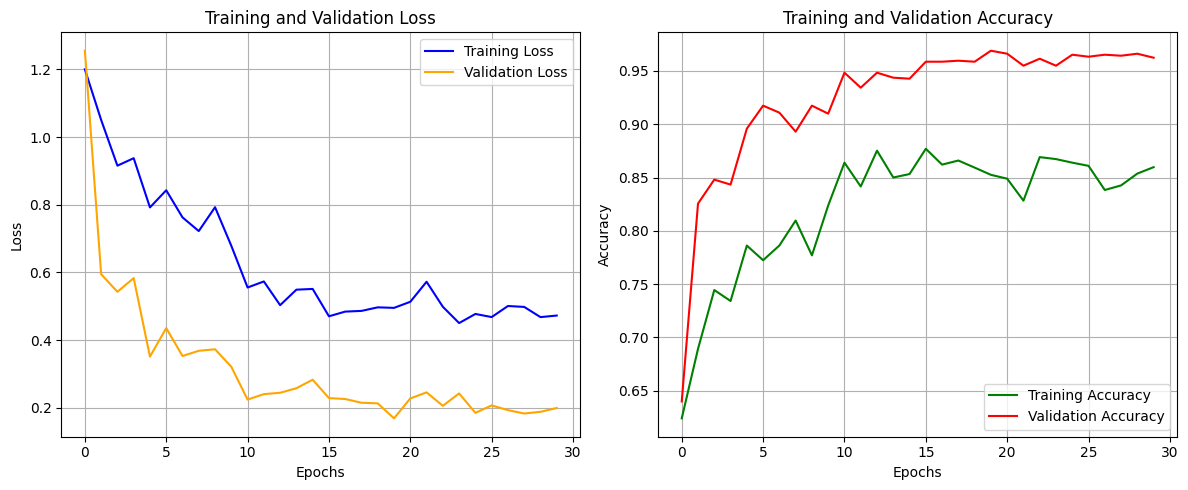

In [35]:
plot_losses_and_accuracies(train_losses, val_losses, train_accuracies, val_accuracies)

In [36]:
model.load_state_dict(torch.load('densenet_only_cutmix.pth'))
all_labels, all_preds = evaluate_model(model, val_loader)

Corrupt JPEG data: premature end of data segment


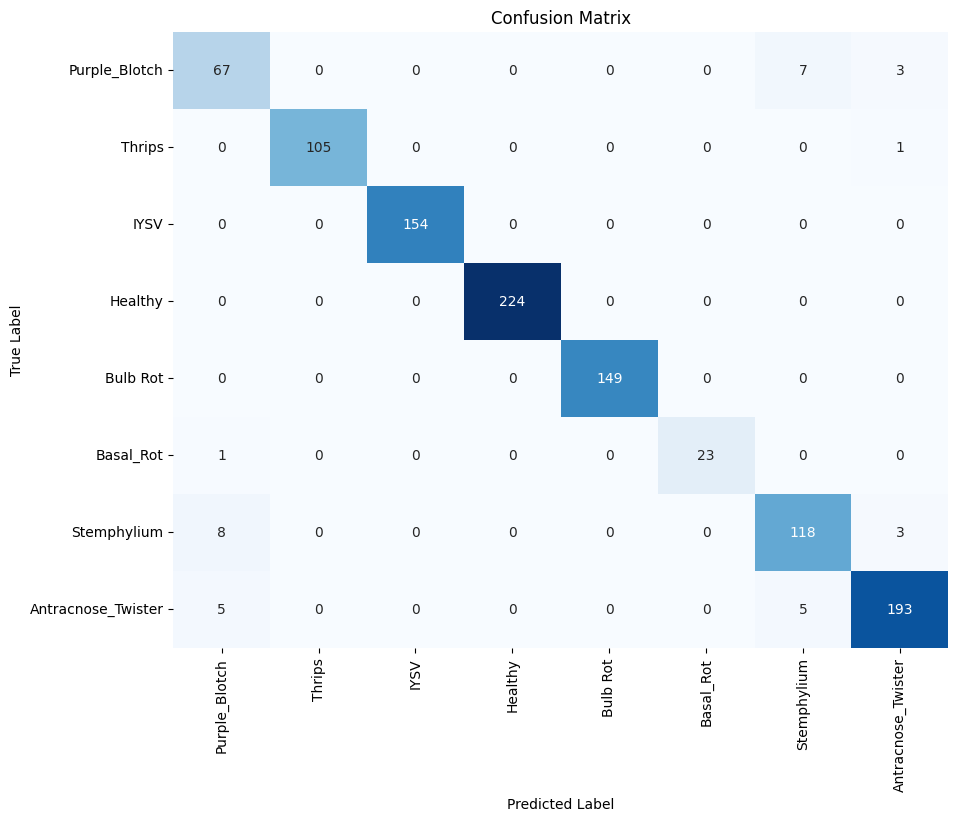

Total Accuracy: 96.90%
Class 'Purple_Blotch' Accuracy: 87.01%
Class 'Thrips' Accuracy: 99.06%
Class 'IYSV' Accuracy: 100.00%
Class 'Healthy' Accuracy: 100.00%
Class 'Bulb Rot' Accuracy: 100.00%
Class 'Basal_Rot' Accuracy: 95.83%
Class 'Stemphylium' Accuracy: 91.47%
Class 'Antracnose_Twister' Accuracy: 95.07%


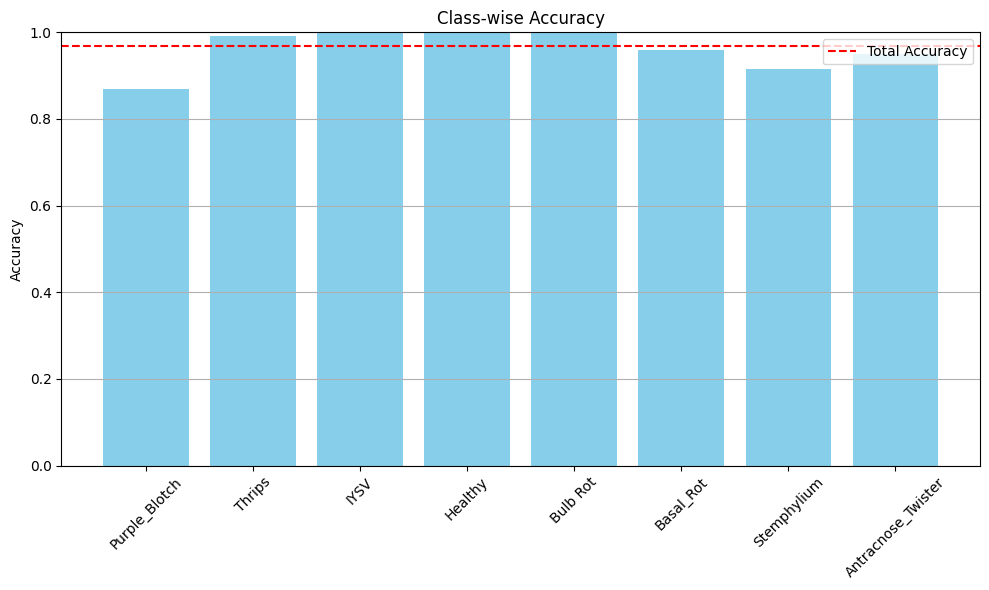

In [37]:
class_names = list(jpg_paths_comb_dict.keys()) 
cm = confusion_matrix(all_labels, all_preds)
num_classes=len(jpg_paths_comb_dict)
plot_confusion_matrix(cm, num_classes, class_names)
plot_classwise_accuracy(cm, jpg_paths_comb_dict)